In [51]:
import pandas as pd
df = pd.read_excel("Sample5_taipower.xlsx",sheetname='sheet1')
df[:5]

,year,peak_load,PRM
0,71,691.8,26.8
1,72,780.8,29.2
2,73,851.7,22.1
3,74,871.6,55.1
4,75,990.0,48.3


In [52]:
df[['peak_load','PRM']].describe()

,peak_load,PRM
count,34.000000,34.000000
mean,2271.870588,17.835294
std,930.521477,11.589281
min,691.800000,4.200000
25%,1471.350000,11.125000
50%,2401.800000,16.050000
75%,3124.275000,22.000000
max,3524.800000,55.100000


In [53]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

df.peak_load = df.peak_load.astype(float)                   
df.PRM = df.PRM.astype(float) 

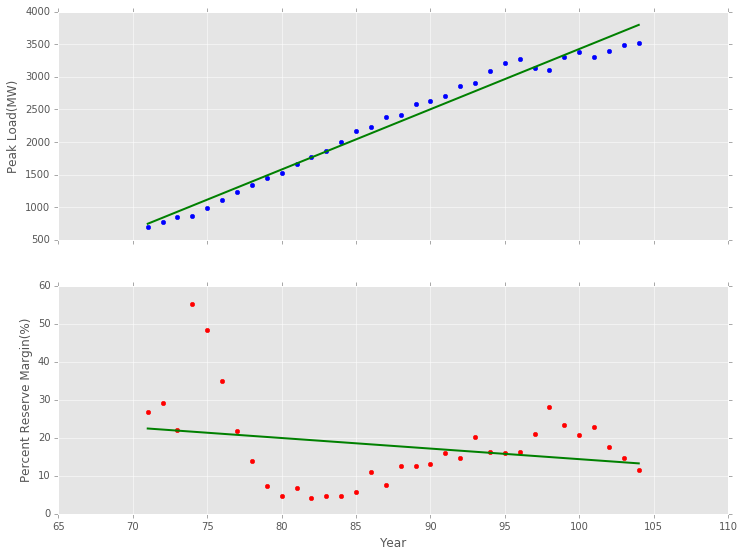

In [54]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

plt.figure(figsize=(12, 9))
# Training for figure 1
regr.fit(df[['year']], df[['peak_load']])   #training: predit peak_load by year
f1 = plt.subplot(211) #2x1的第1張圖
plt.scatter(df.year,df.peak_load, color='blue')
plt.plot(df.year, regr.predict(df[['year']]), color='green', linewidth=2)
plt.setp(f1.get_xticklabels(), visible=False) #不顯示x軸ticks
plt.ylabel('Peak Load(MW)')

# Training for figure 1
regr.fit(df[['year']], df[['PRM']])      #training: predit PRM by year
f2 = plt.subplot(212, sharex=f1) #2x1的第2張圖，x軸ticks共用
plt.scatter(df.year,df.PRM,color='red')    #b: blue
plt.plot(df.year, regr.predict(df[['year']]), color='green', linewidth=2)
plt.ylabel('Percent Reserve Margin(%)')
plt.xlabel('Year')